In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt

## Exercitiul 1

### Punctul a

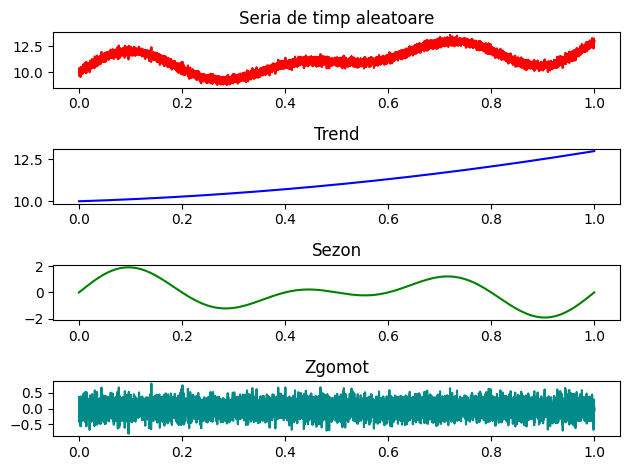

In [9]:
def trend(t: np.ndarray, a: int = 2, b: int = 1, c: int = 10) -> np.ndarray:
    return a * t ** 2 + b * t + c

def sezon(f1: int, f2: int, t: np.ndarray) -> np.ndarray:
    return np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

def zgomot(scale: float, t: np.ndarray) -> np.ndarray:
    return np.random.normal(0, scale, len(t))

N = 10000
t = np.linspace(0, 1, N)

TREND = trend(t)
SEZON = sezon(3, 2, t)
ZGOMOT = zgomot(0.2, t)
time_series = TREND + SEZON + ZGOMOT

signals = [time_series, TREND, SEZON, ZGOMOT]
titles = [
    "Seria de timp aleatoare",
    "Trend",
    "Sezon",
    "Zgomot"
]
colors = ['red', 'blue', 'green', 'darkcyan']

fig, axs = plt.subplots(4, 1)
for i, signal in enumerate(signals):
    axs[i].plot(t, signal, color=colors[i])
    axs[i].set_title(titles[i])
    
plt.tight_layout()

if not os.path.exists('exercitiul1'):
    os.mkdir('exercitiul1')

plt.savefig(os.path.join('exercitiul1', f"pct_a.png"))
plt.savefig(os.path.join('exercitiul1', f"pct_a.pdf"))

plt.show()

### Punctul b